In [1]:
# imports
import matplotlib.pyplot as plt
from seqeval.metrics import classification_report
 
import sys
sys.path.append("../")
from scripts.evaluation import extract_true_and_pred_labels
from scripts.load_data import label_mapping, read_tsv_file, read_iob2_file

# Non-augmented dev data

In [2]:
slot_f1_list = []

for i in range(18): 
    pred_file = f"aug_preds/{i}dev_pred.iob2"
    
    # run the script and save output
    !python ../scripts/span_f1.py ../data/no_overlap_da_news/da_news_dev.iob2 {pred_file} > output.txt
    
    # read the third line and extract slot-f1
    with open("output.txt") as f:
        lines = f.readlines()
        slot_f1_line = lines[2].strip()  
        slot_f1 = float(slot_f1_line.split()[-1])
        slot_f1_list.append(slot_f1)

print("All slot-f1 scores:", slot_f1_list)

All slot-f1 scores: [0.7353951890034365, 0.707105719237435, 0.7216494845360826, 0.7115716753022453, 0.7260034904013961, 0.7172413793103448, 0.71280276816609, 0.7344827586206898, 0.7448979591836735, 0.7269565217391304, 0.7228915662650603, 0.7257240204429302, 0.7194492254733218, 0.71280276816609, 0.7095652173913044, 0.7284991568296796, 0.7044673539518901, 0.6980802792321117]


# Augmented dev data

In [3]:
me_slot_f1_list = []

for i in range(18):  
    pred_file = f"aug_preds/{i}me_dev_pred.iob2"
    
    # run the script and save output
    !python ../scripts/span_f1.py ../data/me_data/middle_eastern_dev.iob2 {pred_file} > output.txt
    
    # read the third line and extract slot-f1
    with open("output.txt") as f:
        lines = f.readlines()
        slot_f1_line = lines[2].strip() 
        slot_f1 = float(slot_f1_line.split()[-1])
        me_slot_f1_list.append(slot_f1)

print("All slot-f1 scores:", me_slot_f1_list)

All slot-f1 scores: [0.6644182124789207, 0.6993243243243243, 0.7045075125208681, 0.7245409015025042, 0.7394957983193279, 0.721476510067114, 0.746218487394958, 0.7705192629815746, 0.7516556291390729, 0.7361344537815127, 0.7529021558872305, 0.7483443708609272, 0.7579298831385642, 0.7387687188019968, 0.7361344537815127, 0.7272727272727272, 0.7197346600331674, 0.7315436241610738]


# Plotting the scores

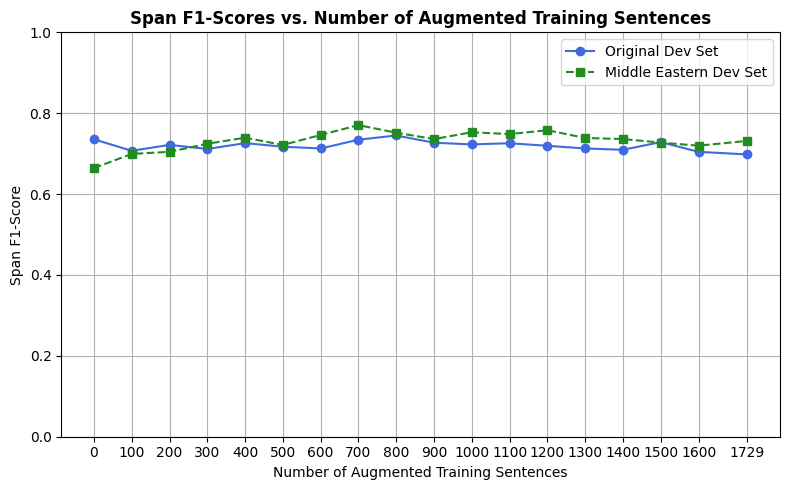

In [4]:
# no. of sentences
x = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1729]

plt.figure(figsize=(8, 5))

plt.plot(x, slot_f1_list, color='royalblue', marker='o', label='Original Dev Set')
plt.plot(x, me_slot_f1_list, color='forestgreen', marker='s', label='Middle Eastern Dev Set', linestyle='--')

plt.xlabel("Number of Augmented Training Sentences")
plt.ylabel("Span F1-Score")
plt.title("Span F1-Scores vs. Number of Augmented Training Sentences", fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(x)  
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Classification reports

In [5]:
# paths to data
path_dev = "../data/no_overlap_da_news/da_news_dev.tsv"
path_dev_pred = "aug_preds/3dev_pred.iob2" 

In [6]:
path_me_dev = "../data/me_data/middle_eastern_dev.tsv"
path_me_dev_pred = "aug_preds/3me_dev_pred.iob2" 

In [7]:
label2id, id2label = label_mapping(path_dev)

In [8]:
# reading in files
dev_data = read_tsv_file(path_dev, label2id)
dev_pred = read_iob2_file(path_dev_pred, label2id)
me_dev_data = read_tsv_file(path_me_dev, label2id)
me_dev_pred = read_iob2_file(path_me_dev_pred, label2id)

In [9]:
# saving all true and predicted labels
true_labels, pred_labels = extract_true_and_pred_labels(dev_data, dev_pred)
me_true_labels, me_pred_labels = extract_true_and_pred_labels(me_dev_data, me_dev_pred)

In [10]:
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

         LOC       0.74      0.83      0.78        70
        MISC       0.54      0.34      0.42        61
         ORG       0.72      0.60      0.65        85
         PER       0.92      0.83      0.87        94

   micro avg       0.76      0.67      0.71       310
   macro avg       0.73      0.65      0.68       310
weighted avg       0.75      0.67      0.70       310



In [11]:
print(classification_report(me_true_labels, me_pred_labels))

              precision    recall  f1-score   support

         LOC       0.74      0.83      0.78        70
        MISC       0.53      0.34      0.42        61
         ORG       0.73      0.64      0.68        85
         PER       0.82      0.89      0.86        94

   micro avg       0.74      0.70      0.72       310
   macro avg       0.71      0.68      0.68       310
weighted avg       0.72      0.70      0.70       310

